In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import fsolve
from sympy import *
import sympy as sym
import math


r = 0.7390851332151607
result= 0.0
0.0


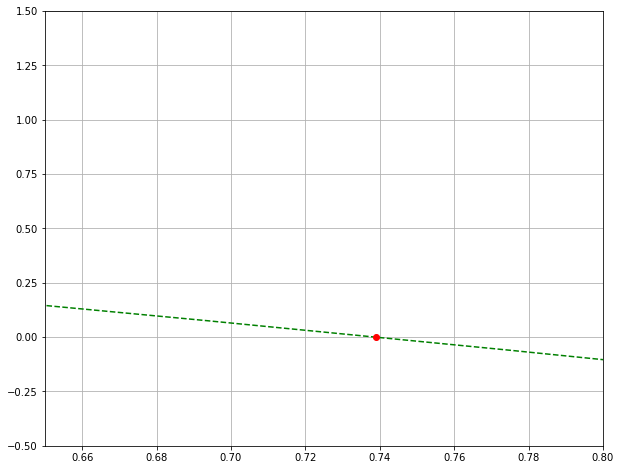

In [8]:
f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, 1)
print("r =", r[0])

# Verify the solution is a root
result = f(r[0])
print("result=", result)
print(np.cos(r[0]) - r[0])

x = np.linspace(-2, 2, 50)
plt.figure(figsize=(10, 8))
plt.plot(x, np.cos(x) - x, 'g--')
plt.plot(r, np.cos(r[0]) - r[0], 'ro' )
plt.xlim(.65,.8)
plt.ylim(-.5, 1.5)
plt.grid()
plt.show()

root = -3.520473592865603e+83
[False False]
substiting -3.520473592865603e+83 into 1/x = -2.8405269166811667e-84
The number of calls to function has reached maxfev = 400.


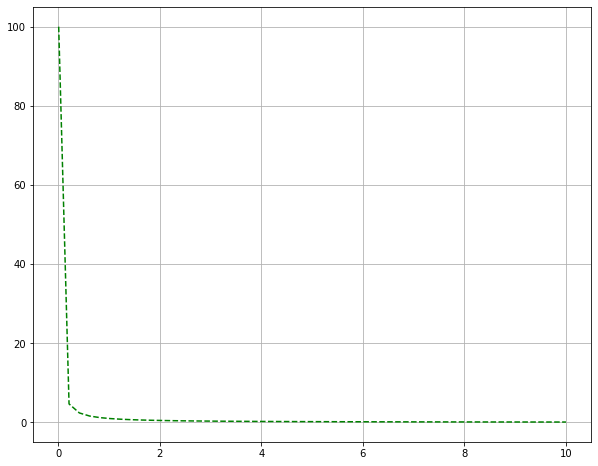

In [106]:
f = lambda x: 1/x
r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print(f'root = {r[0]}' )

result = f(r[0])
print(np.isclose(f(r), [-0.1, 0.1]))  # func(root) should be almost 0.0.
print(f'substiting {r[0]} into 1/x, f(x) = {result}')
print(mesg)
x = np.linspace(.01, 10, 50)
plt.figure(figsize=(10, 8))
plt.plot(x, 1/x, 'g--')

plt.grid()
plt.show()

In [117]:

f = lambda x: x**2 + tol/2

r = optimize.fsolve(f, [-2])
e = tol/2

print(f'root = {r}' )
print(f'error = {e}')
result = f(r)  #f(r)
print(f'substiting {r} f(x) = {result}')


root = [-1.13621075e-83]
error = 0.0
substiting [-1.13621075e-83] f(x) = [1.29097488e-166]


In [118]:
f = lambda x: 1/x

r = optimize.fsolve(f, [1])
e = tol/2

print(f'root = {r}' )
print(f'error = {e}')
result = f(r)  #f(r)
print(f'substiting {r} f(x) = {result}')

root = [1.76023682e+83]
error = 0.0
substiting [1.76023682e+83] f(x) = [5.68105377e-84]


root = 1.4375; for tol = 0.1
f(r1) = 0.06640625; for tol = 0.1
root = 1.4140625; for tol = 0.01
f(r2) = -0.00042724609375; for tol = 0.01
root = 1.4142135605216026; for tol = 1e-08
f(r3) = -5.236811428943611e-09; for tol = 1e-08
root = -1.4140625; for tol = 0.01
f(r4) = -0.00042724609375; for tol = 0.01


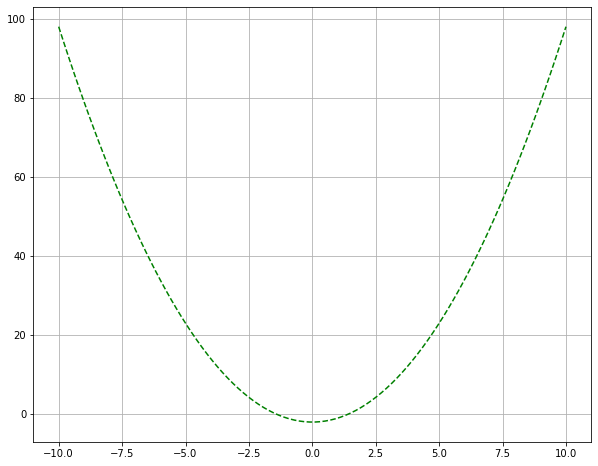

In [134]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)


f = lambda x: x**2 - 2
a = 0
b = 2

tol1 = 0.1
tol2 = 0.01
tol3 = 0.00000001

r1 = my_bisection(f, a, b, tol1)
r2 = my_bisection(f, a, b, tol2)
r3 = my_bisection(f, a, b, tol3)

#  a=2 and b=4 for the above function (f)
# tol = 0.01
r4 = my_bisection(f, -2, 0, tol2)

print(f"root = {r1}; for tol = {tol1}")
print(f"f(r1) = {f(r1)}; for tol = {tol1}")
print(f"root = {r2}; for tol = {tol2}")
print(f"f(r2) = {f(r2)}; for tol = {tol2}")
print(f"root = {r3}; for tol = {tol3}")
print(f"f(r3) = {f(r3)}; for tol = {tol3}")
print(f"root = {r4}; for tol = {tol2}")
print(f"f(r4) = {f(r4)}; for tol = {tol2}")

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 8))
plt.plot(x, x**2 - 2, 'g--')

plt.grid()
plt.show()

print("""
There are 2 roots and the bisection method above will only find one
within a given interval. If two exist between the interval it will
produce an error saying there are no roots. There needs to be a mod
made to check for discriminates if a polynomal is the function.""")

In [5]:
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))
print(f'accuracy = {np.abs(np.sqrt(2)-newton_raphson)}')

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951
accuracy = 7.215191261922271e-05


In [7]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


In [2]:
x0 = 3.14
x1 = x0-(x0**3+3*x0**2-2*x0-5)/(3*x0**2+6*x0-2)
print("x1 =", x1)
print(x1**3+3*x1**2-2*x1-5)

x1 = 2.0788363335545084
12.790825826611247


Iteration 0: x = -10 f(x) = -10890
Iteration 1: x = -5.2631578947368425 f(x) = -2810.613792097974
Iteration 2: x = -2.786265853336076 f(x) = -695.1720294381521
Iteration 3: x = -1.5867482576111596 f(x) = -154.18532225857314
Iteration 4: x = -1.110725063853426 f(x) = -23.630604487908485
Iteration 5: x = -1.0056282890370292 f(x) = -1.1401773604316645
Iteration 6: x = -1.0000160620245675 f(x) = -0.0032445555354883027
Iteration 7: x = -1.0000000001315466 f(x) = -2.657239406289591e-08
Iteration 8: x = -1.0 f(x) = 0.0


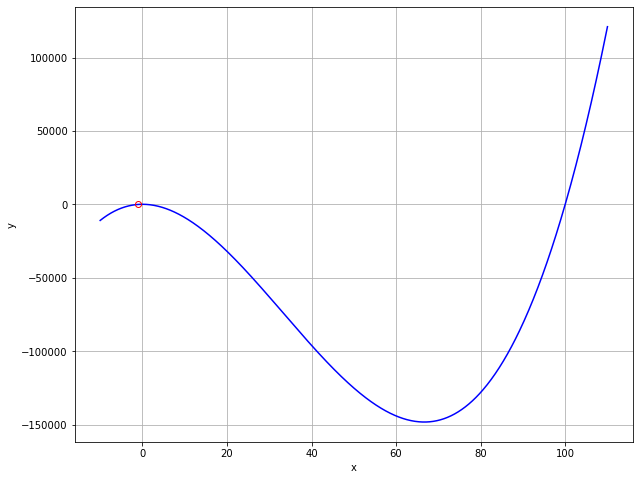

estimate = -1.0
x**3 - 100*x**2 - x + 100 = 0.0; at x = -1.0
roots:[ -1. 100.]


In [22]:
x = Symbol('x')
f = x**3 - 100*x**2 - x + 100
fs = f
f_prime = f.diff(x) # first order deritive)
f = lambdify(x, f)
dfdx = lambdify(x, f_prime)


# Newton-Raphson Algorithm
max_iter = 100  # Max iterations
tol = 1E-15  # Tolerance
i = 0  # Iteration counter
x0 = -10  # Initial guess
xi_1 = x0

print(f'Iteration {str(i)}: x = {str(x0)} f(x) = {str(f(x0))}')
# Iterating until either the tolerance or max iterations is met
while np.abs(f(xi_1)) > tol or i > max_iter:
    i = i + 1
    xi = xi_1 - (f(xi_1) / dfdx(xi_1))  # Newton-Raphson equation
    print(f'Iteration {str(i)}: x = {str(xi)} f(x) = {str(f(xi))}')
    xi_1 = xi
    
    
# Creating Data for the Line
x_plot = np.linspace(-10, 110, 1000)
y_plot = f(x_plot)
 
# Plotting Function
fig = plt.figure(figsize=(10, 8))
plt.plot(x_plot, y_plot, 'b')
plt.plot(xi, f(xi), 'ro', fillstyle='none')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else: 
        return my_newton(f, dfdx, x0 - f(x0)/dfdx(x0), tol)

estimate = my_newton(f, f_prime, x0, tol)
print("estimate =", estimate)
print(f"{fs} = {f(estimate)}; at x = {estimate}")

roots = fsolve(f, [-5, 80])
print(f'roots:{roots}')

In [6]:
f = lambda y: y**(n) - x
df = lambda y: n*y

In [16]:
n = 2.6
x = 1.2
y = 3
print(f(y), df(y))
while np.abs(f(y)) > 0.1:
    r = y - f(y)/df(y)
    y = r
    print(r)

16.198638404385868 7.800000000000001
0.9232514866171968
1.084672534264498
